# LIVE MNIST 

The LIVE MNIST project aims to create an interactive and dynamic visualization of the training, validation, and testing process for the well-known MNIST dataset. Users will be able to configure the number of layers and nodes in a Convolutional Neural Network (CNN) and observe a live representation of the model’s structure and learning progress directly on a web interface. Additionally, the project will feature an interactive drawing tool where users can sketch digits in real-time and instantly see the model’s predicted probabilities for each number, making the experience both educational and engaging.

1) MODEL rep

In [ ]:
#pip install matplotlib

  Using cached matplotlib-3.10.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp313-cp313-macosx_10_13_universal2.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.1.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp313-cp313-macosx_11_0_arm64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp313-cp313-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp313-cp313-macosx_10_13_universal2.whl (2.7 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl (65 kB)
Using cached pillow-11.1.0-cp313-cp313-macosx_11_0_arm64.whl (3.1 MB)
Using cached pyparsing-3.2.1

In [ ]:
#pip install pandas

  Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached numpy-2.2.2-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl (11.3 MB)
Using cached numpy-2.2.2-cp313-cp313-macosx_14_0_arm64.whl (5.1 MB)
Using cached pytz-2025.1-py2.py3-none-any.whl (507 kB)
Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#pip install numpy

Note: you may need to restart the kernel to use updated packages.


Basic libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

This are the directions of our training and testing data

In [11]:
train_x = "dataset/ubyte/train-images.idx3-ubyte"
train_y = "dataset/ubyte/train-labels.idx1-ubyte"
test_x = "dataset/ubyte/t10k-images.idx3-ubyte"
test_y = "dataset/ubyte/t10k-labels.idx1-ubyte"

train_csv = "dataset/csv/train.csv"
test_csv = "dataset/csv/test.csv"

We will convert the ubyte into csv. 

In [12]:
def convert (imgs, labels, outline, n):
    imgf = open(imgs, 'rb') #this function opens the ubyte file.
    labelf = open(labels, 'rb')
    csvf = open(outline, 'w')

    imgf.read(16) #Jumping few bytes due to metadata
    labelf.read(8)
    images = []

    for i in range(n):
        image = [ord(labelf.read(1))] #The reason is 1 is because you want to read just 1 byte. When readed, it automatically jumps to next byte.
        for j in range(28*28):
            image.append(ord(imgf.read(1))) #When appending single num, we added to the list we are in.
        images.append(image)  #Finally adding the existing list to another one.
    
    for image in images:
        csvf.write(",".join(str(plx) for plx in image)+ "\n") #The conversion into csv file.

    imgf.close()
    labelf.close()
    csvf.close()

In [13]:
#convert(train_x, train_y, train_csv, 60000) #generating the files
#convert(test_x, test_y, test_csv, 10000)

In [14]:
train_file = open(train_csv, 'r')  
train_list = train_file.readlines()
train_file.close()
print(len(train_list))
num = 7

60000


In [15]:
train_list[num]

'3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,43,105,255,253,253,253,253,253,174,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,139,224,226,252,253,252,252,252,252,252,252,158,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,178,252,252,252,252,253,252,252,252,252,252,252,252,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,109,252,252,230,132,133,132,132,189,252,252,252,252,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,29,29,24,0,0,0,0,14,226,252,252,172,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85,243,252,252,144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,88,189,252,252,252,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,91,212,247,252,252,252,204,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,125,193,193,193,253,252,252,252,238,102,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,222,252,252,252,252,253,252,25

In [16]:
class Representations:
    def rep_imag(list = train_list, num=0):
        values = list[num].split(",")
        images_array = np.asarray(values[1:], dtype=float).reshape((28,28))
        plt.imshow(images_array, cmap = "Grays", interpolation = "None")
        plt.grid(True, "major")

    def rep_matrix (list = train_list, num=0):
        values = list[num].split(",")
        images_array = np.asarray(values[1:], dtype=float).reshape((28,28))
        image_matrix = images_array.astype(int)
        print(pd.DataFrame(image_matrix).to_string(index=False, header=False))


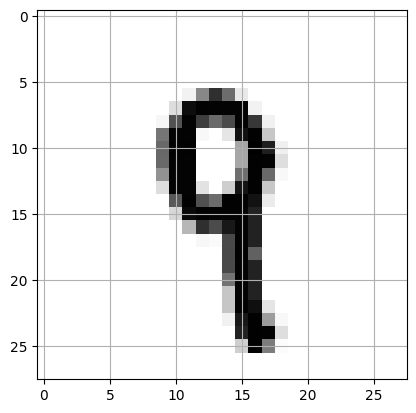

In [17]:
Representations.rep_imag(train_list, 13456)

In [18]:
Representations.rep_matrix(train_list, 3847)

0 0 0 0 0 0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0   0   0  23  87 170 254 255 254 177  22   0   0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0   0   3 144 253 253 253 216 221 253  98   0   0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0   0  96 253 251 198  80   0  37 251 180   1   0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0  14 220 253 106   0   0   0   0 197 230  13   0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 100 253 174   1   0   0   0   0 197 219  89   9 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 141 253 174   1   0   

In [19]:
test_file = open(test_csv, 'r')
test_list = test_file.readlines()
test_file.close()
print(len(test_list))

10000


In [20]:
class CNN:
    def __init__(self, sizes, epochs, lr):
        self.sizes = sizes  
        self.epochs = epochs 
        self.lr = lr 

        input_layer = sizes[0]
        hidden_1 = sizes[1]
        hidden_2 = sizes[2]
        output_layer = sizes[3]

        self.params = {
            'W1': np.random.randn(hidden_1, input_layer) * np.sqrt(1. / hidden_1),
            'W2': np.random.randn(hidden_2, hidden_1) * np.sqrt(1. / hidden_2),
            'W3': np.random.randn(output_layer, hidden_2) * np.sqrt(1. / output_layer)
        }

    def sigmoid(self, x, derivative=False):
        sig = 1 / (1 + np.exp(-x))
        if derivative:
            return sig * (1 - sig)
        return sig
    
    def softmax(self, x, derivative=False):
        exps = np.exp(x - np.max(x))  # Evitar overflow
        softmax_vals = exps / np.sum(exps, axis=0)
        if derivative:
            return softmax_vals * (1 - softmax_vals)
        return softmax_vals

    def forward_pass(self, x_train):
        params = self.params
        params['A0'] = x_train

        params['Z1'] = np.dot(params['W1'], params['A0'])
        params['A1'] = self.sigmoid(params['Z1'])

        params['Z2'] = np.dot(params['W2'], params['A1'])
        params['A2'] = self.sigmoid(params['Z2'])

        params['Z3'] = np.dot(params['W3'], params['A2'])
        params['A3'] = self.softmax(params['Z3'])

        return params['A3']
    
    def backward_pass(self, y_train, output):
        params = self.params
        change_w = {}

        error = 2 * (output - y_train) / output.shape[0] * self.softmax(params['Z3'], derivative=True)
        change_w['W3'] = np.outer(error, params['A2'])

        error = np.dot(params['W3'].T, error) * self.sigmoid(params['Z2'], derivative=True)
        change_w['W2'] = np.outer(error, params['A1'])

        error = np.dot(params['W2'].T, error) * self.sigmoid(params['Z1'], derivative=True)
        change_w['W1'] = np.outer(error, params['A0'])

        return change_w
    
    def update_weights(self, change_w):
        for key, val in change_w.items():
            if self.params[key].shape == val.shape:
                self.params[key] -= self.lr * val

    def compute_accuracy(self, test_list):
        predictions = []
        for x in test_list:
            values = x.split(',')
            inputs = (np.asarray(values[1:], dtype=np.float32) / 255.0 * 0.99) + 0.01
            targets = np.zeros(10) + 0.01
            targets[int(values[0])] = 0.99
            output = self.forward_pass(inputs)
            pred = np.argmax(output)
            predictions.append(pred == np.argmax(targets))

        return np.mean(predictions)

    def train(self, train_list, test_list):
        start_time = time.time()

        for iter in range(self.epochs):
            for x in train_list:
                values = x.split(',')
                inputs = (np.asarray(values[1:], dtype=np.float32) / 255.0 * 0.99) + 0.01
                targets = np.zeros(10) + 0.01
                targets[int(values[0])] = 0.99
                output = self.forward_pass(inputs)
                change_w = self.backward_pass(targets, output)
                self.update_weights(change_w)

            accuracy = self.compute_accuracy(test_list)
            print(f'Epoch: {iter+1}, Time Spent: {time.time()-start_time:.02f}s, Accuracy: {accuracy*100:.2f}%')


In [21]:
#dnn = CNN(sizes = [784, 128, 64, 10], epochs = 10, lr = 0.03)
#dnn.train(train_list, test_list)

We have achived an accuraccy of 92.41% which is quite fine but, we could improve this by inserting a decaying learning rate. At the star, this will make big changes on the weights and each epoch will have a decrese on the learning rate.

In [22]:
class CNN_decay:
    def __init__(self, sizes, epochs, lr, decay=0.0): #Here we are defining the neural network
        self.sizes = sizes      #The size of the network
        self.epochs = epochs    #This is the number of iterations we are going to do, for the network to learn
        self.lr = lr            #The learnign rate (does not mean that at more lr it will be better always. Its convex)
        self.decay = decay      #Decay is a variable to lower the lr in order to have small lr for the most advanced epochs

        input_layer = sizes[0]  #In this case is the number of pixels of our image 28x28 or 784
        hidden_1 = sizes[1]
        hidden_2 = sizes[2]
        output_layer = sizes[3]

        self.params = {
            'W1': np.random.randn(hidden_1, input_layer) * np.sqrt(1. / hidden_1),
            'W2': np.random.randn(hidden_2, hidden_1) * np.sqrt(1. / hidden_2),
            'W3': np.random.randn(output_layer, hidden_2) * np.sqrt(1. / output_layer)
        }

    def sigmoid(self, x, derivative=False):
        sig = 1 / (1 + np.exp(-x))
        if derivative:
            return sig * (1 - sig)
        return sig
    
    def softmax(self, x, derivative=False):
        exps = np.exp(x - np.max(x))  
        softmax_vals = exps / np.sum(exps, axis=0)
        if derivative:
            return softmax_vals * (1 - softmax_vals)
        return softmax_vals

    def forward_pass(self, x_train):
        params = self.params
        params['A0'] = x_train

        params['Z1'] = np.dot(params['W1'], params['A0'])
        params['A1'] = self.sigmoid(params['Z1'])

        params['Z2'] = np.dot(params['W2'], params['A1'])
        params['A2'] = self.sigmoid(params['Z2'])

        params['Z3'] = np.dot(params['W3'], params['A2'])
        params['A3'] = self.softmax(params['Z3'])

        return params['A3']
    
    def backward_pass(self, y_train, output):
        params = self.params
        change_w = {}

        error = 2 * (output - y_train) / output.shape[0] * self.softmax(params['Z3'], derivative=True)
        change_w['W3'] = np.outer(error, params['A2'])

        error = np.dot(params['W3'].T, error) * self.sigmoid(params['Z2'], derivative=True)
        change_w['W2'] = np.outer(error, params['A1'])

        error = np.dot(params['W2'].T, error) * self.sigmoid(params['Z1'], derivative=True)
        change_w['W1'] = np.outer(error, params['A0'])

        return change_w
    
    def update_weights(self, change_w):
        for key, val in change_w.items():
            if self.params[key].shape == val.shape:
                self.params[key] -= self.lr * val

    def compute_accuracy(self, list):
        predictions = []
        for x in list:
            values = x.split(',')
            inputs = (np.asarray(values[1:], dtype=np.float32) / 255.0 * 0.99) + 0.01
            targets = np.zeros(10) + 0.01
            targets[int(values[0])] = 0.99
            output = self.forward_pass(inputs)
            pred = np.argmax(output)
            predictions.append(pred == np.argmax(targets))

        return np.mean(predictions)

    def train(self, train_list, test_list):
        start_time = time.time()

        for iter in range(self.epochs):
            for x in train_list:
                values = x.split(',')
                inputs = (np.asarray(values[1:], dtype=np.float32) / 255.0 * 0.99) + 0.01
                targets = np.zeros(10) + 0.01
                targets[int(values[0])] = 0.99
                output = self.forward_pass(inputs)
                change_w = self.backward_pass(targets, output)
                self.update_weights(change_w)
            
            self.lr *= (1. / (1. + self.decay * iter))
            
            accuracy = self.compute_accuracy(test_list)
            print(f'Epoch: {iter+1}, Time Spent: {time.time()-start_time:.02f}s, Accuracy: {accuracy*100:.2f}%, Learning Rate: {self.lr:.6f}')


In [23]:
#dnn2 = CNN_decay(sizes = [784, 128, 64, 10], epochs = 7, lr = 0.9, decay = 0.06)
#dnn2.train(train_list, test_list)

In [25]:
dnn3 = CNN_decay(sizes = [784, 128, 64, 10], epochs = 3, lr = 2, decay = 0.1)
dnn3.train(train_list, test_list)

Epoch: 1, Time Spent: 10.84s, Accuracy: 94.70%, Learning Rate: 2.000000
Epoch: 2, Time Spent: 21.58s, Accuracy: 96.18%, Learning Rate: 1.818182
Epoch: 3, Time Spent: 32.57s, Accuracy: 96.27%, Learning Rate: 1.515152


In [26]:
def forwarding_output(input_data, num, list, neural):
    
    actual_num = None 
    if num is not None:
        values = list[num].split(',')  
        inputs = (np.asarray(values[1:], dtype=np.float32) / 255.0 * 0.99) + 0.01 
        actual_num = int(float(values[0]))  
    elif input_data is not None:
        inputs = (np.asarray(input_data, dtype=np.float32) / 255.0 * 0.99) + 0.01  
    else:
        return None, None
    result = neural.forward_pass(inputs)
    np.set_printoptions(suppress=True, precision=4)

    predicted_label = int(np.argmax(result)) 
    return actual_num, predicted_label 

In [27]:
forwarding_output(None, 34, train_list, dnn3)

(0, 0)

(7, 7)


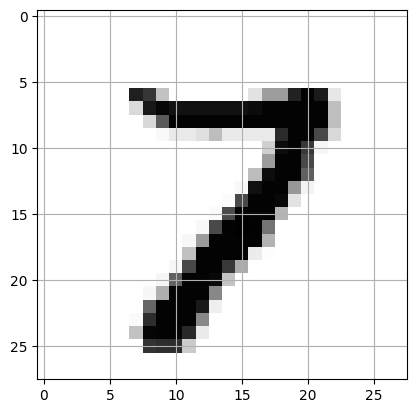

In [28]:
num = 34
lista = test_list
neura = dnn3
print(forwarding_output(None, num, lista, neura))
Representations.rep_imag(lista, num)

In [29]:
print(dnn3.compute_accuracy(train_list))
print(dnn3.compute_accuracy(test_list))

0.97015
0.9627


In [30]:
res_vs_pred = []
lista=test_list
neura = dnn3

for i in range(len(lista)):
    actual, predicted = forwarding_output(None, i, lista, neura)
    if actual is not predicted:
        res_vs_pred.append(i)

In [31]:
len(res_vs_pred)

373

In [ ]:
def plot_wrong_predictions(wrong_indices, listas, neural_model, num_images=10):
    fig, axes = plt.subplots(20, 10, figsize=(12, 32))
    axes = axes.flatten()  

    selected_wrong_indices = wrong_indices[:num_images]  

    for i, idx in enumerate(selected_wrong_indices):
        actual_label, predicted_label = forwarding_output(None, idx, listas, neural_model)
        
        values = listas[idx].split(',') 
        image = np.asarray(values[1:], dtype=np.float32).reshape(28, 28) 

        axes[i].imshow(image, cmap='Greys')
        axes[i].axis('on')  
        axes[i].set_title(f"Actual: {actual_label}\nPredicted: {predicted_label}\nPosition: {idx}", fontsize=10, color='red')

    plt.tight_layout()
    plt.show()

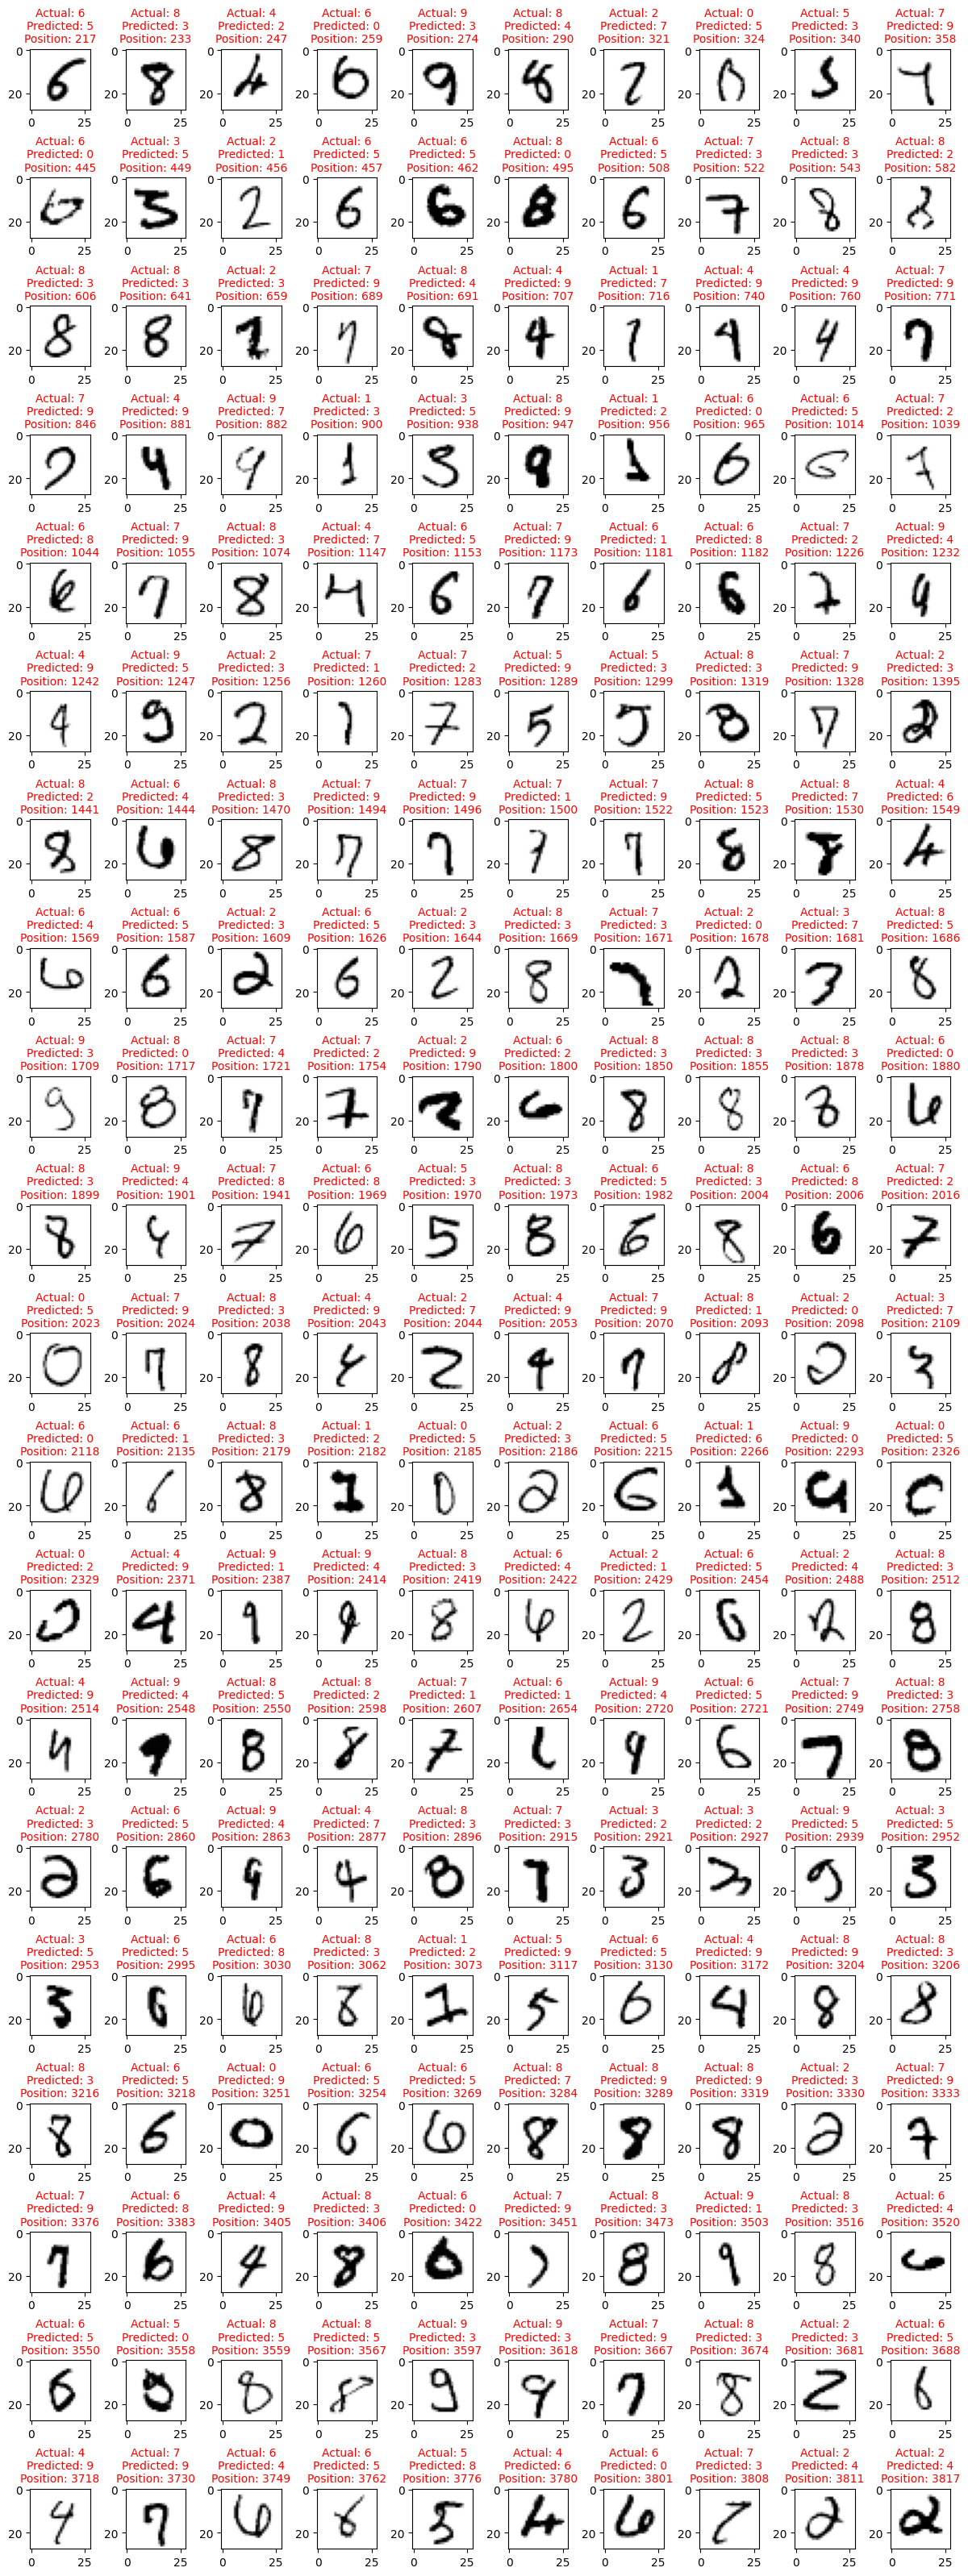

In [33]:
plot_wrong_predictions(wrong_indices=res_vs_pred, listas=test_list, neural_model=dnn3, num_images=200)

In [66]:
import numpy as np
import matplotlib.pyplot as plt

def plot_CNN ():
    plt.figure(figsize=(10, 8), facecolor='white')
    ax = plt.gca()
    ax.set_facecolor('white')

    input_show_first = 3     # Show 3 at the top
    input_show_last = 20     # Show 13 at the bottom
    hidden1_show_first = 2   # Show 2 at the top
    hidden1_show_last = 14    # Show 7 at the bottom
    hidden2_show_first = 1   # Show 4 at the top
    hidden2_show_last = 9    # Show 1 at the bottom
    output_show_all = 10     # Show all 10 nodes

    # Total visible nodes for spacing calculation
    input_visible = input_show_first + input_show_last + 3  # +3 for ellipsis
    hidden1_visible = hidden1_show_first + hidden1_show_last + 3  # +3 for ellipsis
    hidden2_visible = hidden2_show_first + hidden2_show_last + 3  # +3 for ellipsis
    output_visible = output_show_all

    # Calculate spacing based on the layer with more nodes
    node_spacing = 0.1 / max(input_visible, hidden1_visible, hidden2_visible, output_visible)

    # Calculate vertical offsets to center the layers
    vertical_offset_hidden1 = node_spacing * (input_visible - hidden1_visible) / 2
    vertical_offset_hidden2 = node_spacing * (input_visible - hidden2_visible) / 2
    vertical_offset_output = node_spacing * (input_visible - output_visible) / 2

    # Create node positions with uniform spacing
    def create_node_positions(first_count, last_count, spacing=node_spacing, start_pos=0.1, offset=0):
        # Generate positions for first group (top)
        first_positions = [start_pos + offset + i * spacing for i in range(first_count)]
        
        # Generate positions for ellipsis (3 dots)
        ellipsis_start = start_pos + offset + first_count * spacing
        ellipsis_positions = [ellipsis_start + i * spacing for i in range(3)]
        
        # Generate positions for last group (bottom)
        last_start = ellipsis_start + 3 * spacing
        last_positions = [last_start + i * spacing for i in range(last_count)]
        
        return first_positions, ellipsis_positions, last_positions

    # Create node positions - apply offset to center the layers
    input_first, input_ellipsis, input_last = create_node_positions(input_show_first, input_show_last)
    hidden1_first, hidden1_ellipsis, hidden1_last = create_node_positions(
        hidden1_show_first, hidden1_show_last, offset=vertical_offset_hidden1)
    hidden2_first, hidden2_ellipsis, hidden2_last = create_node_positions(
        hidden2_show_first, hidden2_show_last, offset=vertical_offset_hidden2)
    output_positions = [0.1 + vertical_offset_output + i * node_spacing for i in range(output_show_all)]

    # Combine positions for easier iteration
    input_y = input_first + input_last
    hidden1_y = hidden1_first + hidden1_last
    hidden2_y = hidden2_first + hidden2_last
    output_y = output_positions

    # Define node sizes and positions
    node_size = 200
    input_x = 0.1
    hidden1_x = 0.3
    hidden2_x = 0.5
    output_x = 0.7
    node_offset = 0.01  # Offset to position line connections at the edge of nodes

    # Draw connections between layers
    # Input to Hidden1
    for i, y1 in enumerate(input_y):
        for j, y2 in enumerate(hidden1_y):
            plt.plot([input_x + node_offset, hidden1_x - node_offset], [y1, y2], 
                    color='darkblue', alpha=.6, linewidth=.5)

    # Hidden1 to Hidden2
    for i, y1 in enumerate(hidden1_y):
        for j, y2 in enumerate(hidden2_y):
            plt.plot([hidden1_x + node_offset, hidden2_x - node_offset], [y1, y2], 
                    color='darkblue', alpha=.6, linewidth=.5)

    # Hidden2 to Output
    for i, y1 in enumerate(hidden2_y):
        for j, y2 in enumerate(output_y):
            plt.plot([hidden2_x + node_offset, output_x - node_offset], [y1, y2], 
                    color='darkblue', alpha=.6, linewidth=.5)

    # Draw input nodes as grey squares
    for y in input_first:
        plt.scatter(input_x, y, color='grey', s=node_size, marker='s')
    for y in input_last:
        plt.scatter(input_x, y, color='grey', s=node_size, marker='s')

    # Draw hidden1 nodes as white circles with black outline
    for y in hidden1_first:
        plt.scatter(hidden1_x, y, color='white', s=node_size, marker='o', edgecolors='black')
    for y in hidden1_last:
        plt.scatter(hidden1_x, y, color='white', s=node_size, marker='o', edgecolors='black')

    # Draw hidden2 nodes as white circles with black outline
    for y in hidden2_first:
        plt.scatter(hidden2_x, y, color='white', s=node_size, marker='o', edgecolors='black')
    for y in hidden2_last:
        plt.scatter(hidden2_x, y, color='white', s=node_size, marker='o', edgecolors='black')

    # Draw output nodes as white circles with black outline
    for num,y in enumerate(output_y):
        plt.scatter(output_x, y, color='white', s=node_size, marker='o', edgecolors='black')
        plt.text(output_x + 0.01, y-0.0003, str(num), color='black', fontsize=12, ha='left', va='center')
        

    # Add ellipsis dots
    for y in input_ellipsis:
        plt.scatter(input_x, y, color='grey', s=40, marker='.')
    for y in hidden1_ellipsis:
        plt.scatter(hidden1_x, y, color='grey', s=40, marker='.')
    for y in hidden2_ellipsis:
        plt.scatter(hidden2_x, y, color='grey', s=40, marker='.')

    # Remove axes
    plt.axis('off')

    # Tight layout and show
    plt.tight_layout()
    plt.savefig('neural_network_visualization.png', facecolor='white', dpi=300)
    plt.show()

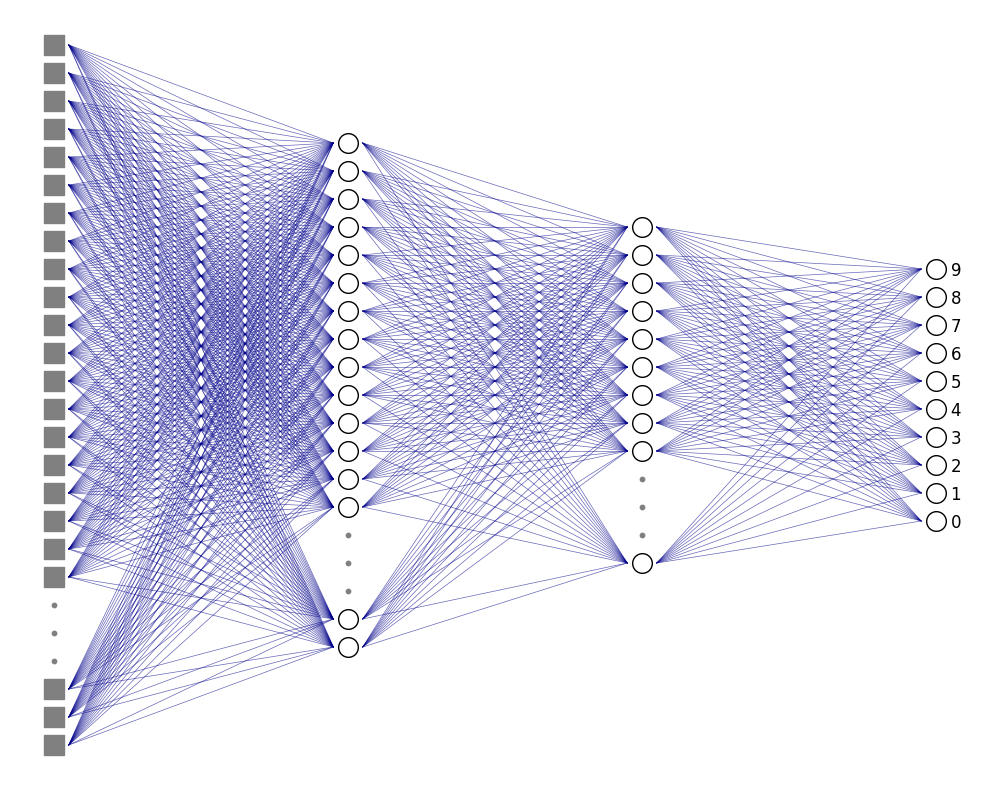

In [67]:
plot_CNN()